---

[//]: # "Header"

<p style="text-align: left;  font-size:18pt; LINE-HEIGHT:30px;">
    <span style="float: left">
     Technische Hochschule Ingolstadt<br>
     Prof. Dr. Sören Gröttrup
    </span>
    <span style="float: right;">
       Machine Learning 1<br>
        <span style="float: right;">WS 23/24</span>
    </span>
</p>

[//]: # "Header Aufgabenblatt"
<br>
<p style="text-align: center;  font-size:18pt; LINE-HEIGHT:30px;">
     <span style="font-weight: bold;">Aufgabenblatt 3</span><br>
     Themen: Cross-Validation, Overfitting, Normalisierung, Einführung in PyTorch<br>
     Abgabetermin: 26.11.23, 23:59 Uhr <br>
     Punkte: 32 (+4)
</p>


---

**Namen:** _Bitte tragen Sie hier die Namen der Abgabegruppe ein._

---

# 1. K-fold Cross-Validation


### Cross-Validation Funktionen in sklearn 
Python stellt einige Funktionen für die Cross-Validation zur Verfügung, welche in der Bibliothek `sklearn.model_selection` zu finden sind. Insbesondere die folgenden Funktionen sind dabei hilfreich:

1. `KFold`
1. `cross_validate`
1. `cross_val_score`

Genaue Informationen finden Sie auf der Seite https://scikit-learn.org. Einige Funktionen geben einen Evaluationsscore zurück. Schauen Sie auch nach, wie Sie den Standard-Rückgabe-Score ändern können, z.B. in den RMSE.

### Daten
Der Datensatz `Ozone.csv` enthält meterologische Daten und die Konzentration von Ozone (O3) in der Luft im Raum Los Angeles. Die folgende Tabelle zeigt die Beschreibung der Variablen.

|Name of variable| Description|
| --- | --- |
|O3| Daily maximum of the hourly average ozone concentration|
|Vh| 500 millibar pressure height|
|Wind| Wind speed in mph|
|Humidity| Humidity in percent|
|Temp| Temperature in degrees Fahrenheit|
|Ibh| Temperature inversion base height in feet|
|Dpg| Pressure gradient in mm Hg|
|Ibt| Inversion base temperature in degrees Fahrenheit|
|Vis| Visibility|
|Day| Day of year|

**Daten laden**

In [2]:
## Packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
# Import data
data = pd.read_csv("./Daten Blatt 3/Ozone.csv")
data

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,3,5710,4,28,40,2693,-25,87,250,33
1,5,5700,3,37,45,590,-24,128,100,34
2,5,5760,3,51,54,1450,25,139,60,35
3,6,5720,4,69,35,1568,15,121,60,36
4,4,5790,6,19,45,2631,-33,123,100,37
...,...,...,...,...,...,...,...,...,...,...
325,8,5630,4,50,50,2851,-5,100,70,384
326,2,5730,3,53,51,111,-14,225,200,387
327,3,5690,3,23,51,5000,-36,107,70,388
328,5,5650,3,61,50,3704,18,83,40,389


In [4]:
data.describe()

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,11.775758,5750.484848,4.848485,58.130303,61.754545,2572.875758,17.369697,161.160606,124.533333,209.424242
std,8.011277,105.708241,2.116963,19.865000,14.458737,1803.885870,35.717181,76.679424,79.362393,104.376374
min,1.000000,5320.000000,0.000000,19.000000,25.000000,111.000000,-69.000000,-25.000000,0.000000,33.000000
25%,5.000000,5690.000000,3.000000,47.000000,51.000000,877.500000,-9.000000,107.000000,70.000000,120.250000
50%,10.000000,5760.000000,5.000000,64.000000,62.000000,2112.500000,24.000000,167.500000,120.000000,205.500000
75%,17.000000,5830.000000,6.000000,73.000000,72.000000,5000.000000,44.750000,214.000000,150.000000,301.750000
max,38.000000,5950.000000,11.000000,93.000000,93.000000,5000.000000,107.000000,332.000000,350.000000,390.000000


In [5]:
# get Featur-Matrix and Target Variable
X = data.drop(columns=("O3"))
y = data["O3"]

## Aufgabe 1.1 (Lineare Regression mittels K-fold X-Validation) [10 Punkte]
1.  Führen Sie folgenden Code aus. Beschreiben Sie was die einzelnen Zeilen Code machen und deren Ergebnis. _Hinweis:_ Ermitteln Sie die Dimension von `X_train`, `X_test`, etc.

```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
```

2. Trainieren Sie ein lineares Regressionsmodell auf den in 1. generierten Trainignsdaten. Berechnen Sie dann den RMSE für den Trainings und Testdatensatz.
2. Erstellen Sie nun ein lineares Regressionsmodell mittels 10-facher Kreuzvalidierung, was aus den meterologischen Daten die Ozone-Konzentration in der Luft schätzt. Sie können dafür die oben angegebenen Funktionen `KFold`, `cross_validate` oder `cross_val_score` nutzen. Verwenden Sie als Gütemaß den _Root Mean Squared Error (RMSE)_.
2. Was ist der RMSE für das in 3. trainierte Modell auf dem Trainings- und auf dem Testdatensatz? Und vergleichen Sie das Ergebnis mit dem RMSE aus Teil 2.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.metrics import mean_squared_error
import math

### Lösung Aufgabe 1.1

In [7]:
...

Ellipsis

## Aufgabe 1.2 (Finden des optimalen k im kNN) [10 Punkte]
Ziel der Aufgabe ist die Erstellung eines kNN-Regressionsmodells, welches die O3-Konzentration auf Basis der anderen Variablen vorhersagt. Für die Wahl des "besten" Modells müssen Sie den optimalen Hyperparameter `k` bestimmen, welcher die Anzahl an Nachbarn im kNN-Modell angibt. In dieser Aufgabe sollen Sie für die Bestimmung das Cross-Validation Verfahren anwenden.

1. Splitten Sie 20% des Datensatzen als Validierungsdaten ab. Benutzen Sie dafür die Funktion `train_test_split` mit `random_state = 123`. 
1. Trainieren Sie auf den restlichen Daten für jedes $k=1,...,50$ ein k-Nearest Neigbor Modelle mittels 10-facher Kreuzvalidierung.
1. Visualisieren Sie den RMSE für die Trainingsdaten und Testdaten innerhalb der Kreuzvalidierung. Für welche $k$ tritt Overfitting ein?
1. Für welches $k$ zeigt das kNN Modell die beste Güte bezogen auf den RMSE? 
1. Erstellen Sie ein finales Modell, indem Sie für das gefundene $k$ ein kNN auf den ganzen Trainingsdaten erzeugen.
1. Validieren Sie das Modell auf den Validierungsdaten. Ist das gefundene Modell geeignet?

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import math

### Lösung Aufgabe 1.2

In [9]:
...

Ellipsis

## Aufgabe 1.3  [10 Punkte]
1. Betrachten Sie den `Ozone` Datensatz. Was für ein Problem könnte hier beim Training eines Modells auftreten? 
1. Informieren Sie sich über die Funktion `StandardScaler()` im Paket `sklearn.preprocessing`. Welche Transformation der Features führt diese aus? 
1. Führen Sie wie in der Aufgabe davor eine 10-fache kreuzvalidierung durch, zur Bestimmung des optimalen $k=1,...,50$ für ein k-Nearest Neighbor Modell, jedoch für skalierte Feature. Sie können dabei den gleichen Validierungsdatensatz wie in der vorherigen Aufgabe verwenden. Berechnen Sie auch hier jeweils den RMSE. Welches $k$ ist in diesem Fall optimal?
1. Trainieren Sie wieder ein finales Modell auf allen Trainignsdaten für das von Ihnen gefundenen optimale $k$ und validieren Sie dieses auf dem Validierungsdatensatz. Vergleichen Sie das Ergebnis mit dem aus der vorherigen Aufgabe.

_Hinweise:_ 
* Achten Sie darauf, dass Sie bei der Erstellung der Modelle in der Kreuzvalidierung Training und Test sauber trennen. Dies gilt auch insbesondere für die Skalierung! 
* Machen Sie sich also Gedanken über die Reihenfolde der einzelnen Schritte, bevor Sie den Algorithmus implementieren.
* Die Funktion `Pipeline` in `sklearn.pipeline` kann hier sehr nützlich sein.

### Lösung Aufgabe 1.3

In [10]:
...

Ellipsis

# 2. Bootstrapverfahren

## Aufgabe 2.1 [2 Punkte]

Sei $B$ die Anzahl an Bootstrap Datensätzen. In der Vorlesung wurde gesagt, dass sich für großes $B$ das Bootstrap-Verfahren so verhält wie eine Leave-one-out CV. Geben Sie dafür eine Begründung an.

### Antwort zu Aufgabe 2.1
Der größte Unterschied zwischen Bootstrap Verfahren und LOO CV ist, dass beim Bootrstrap Verfahren ein "Ziehen mit Zurücklegen" stattfindet, also theoretisch auch zufällig zwei völlig identische Trainingsdatensätze entstehen könnten.Bei einem sehr großen B spielt dieser Zufall allerdings keine Rolle mehr im Verhältnis, da der Fall identischer Datensätze oder doppelter Datenpunkte in einem Trainingsdatensatz B eher gering auftritt. Die Testdatensätze unterscheiden sich dadurch strukturell kaum und der berechnete Error nährt sich einander an. 

# 3. Einführung in  Pytorch

In den nächsten Aufgabenblättern werden wir PyTorch verwenden, um Neuronale Netze zu trainieren. Dieser Abschnitt dient dazu sich selbstständig mit PyTorch vertraut zu machen.

## Aufgabe 3.1 [0 Punkte]

Beschäftigen Sie sich mit Pytorch, in dem Sie z.B. einige der folgenden Tutorien durchspielen.

**Tutorien:**

* https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

* https://cs230.stanford.edu/blog/pytorch/

* https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e

## Aufgabe 3.2 [0 Punkte]

Im unten liegenden Code wird eine Lineare Regression auf dem Datensatz `Ozone` zur Vorhersage von `O3` in PyTorch trainiert. Schauen Sie sich den Code an und versuchen Sie die einzelnen Schritte nachzuvollziehen.

In [11]:
## load Packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as net
import torch.nn.functional as F
import torch.optim as optim

%matplotlib inline
plt.style.use('ggplot')

**Preprocessing**

In [12]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)

In [13]:
# Scale Variables (StandardScaler)
sc = StandardScaler()

# fit & transform scaler
X_train = sc.fit_transform(X_train)

# apply scaler to test set
X_test = sc.transform(X_test)

In [14]:
## To Tensor
x_train_ts = torch.tensor(X_train, dtype=torch.float)
x_test_ts = torch.tensor(X_test, dtype=torch.float)

y_train_ts = torch.tensor(y_train.to_numpy(), dtype=torch.float).view(-1,1)
y_test_ts = torch.tensor(y_test.to_numpy(), dtype=torch.float).view(-1,1)

In [15]:
x_train_ts.shape, y_train_ts.shape

(torch.Size([264, 9]), torch.Size([264, 1]))

**Define Hyper-Parameter, Model and Optimizer**

In [16]:
# Define Hyper-Parameters
n_iterations = 40
learning_rate = 0.05

random_seed = 12
torch.manual_seed(random_seed)

In [17]:
# Definition of the linear regression model
class LinReg(net.Module):
    def __init__(self):
        super(LinReg, self).__init__()
        # 9 Inputs und ein 1 Output, lineare Verarbeitung
        self_linear = net.Linear(9,1)
        #Neuronales Netz mit einem Layer mit 4 Neuronen
        #self.linear_hl = net.Linear(9, 4)
        #self.linear_ol = net.Linear(4,1)
        

    def forward(self, x):
        x = self.linear(x)
        #NN
        #x = self.linear_hl(x)
        #x = torch.relu(X)
        #x = self.linear_ol(x)
        return x

In [18]:
# Initialize Linear Regression & Optimizer (Gradient Descent)
linear_regression = LinReg()
optimizer = optim.SGD(linear_regression.parameters(), lr=learning_rate)

**Run Training**

In [19]:
# Define variable to save the loss for each iteration
train_losses = []
test_losses = []

In [20]:
# Run Training
# Performe Parameter-Update in every Iteration via Gradient Descent

for epoch in range(1, n_iterations + 1):
    
    # --- Training ----#
    optimizer.zero_grad()                       #Gradienten der Parameter werden auf 0 gesetzt
    y_pred = linear_regression(x_train_ts)      #prediction
    train_loss = F.mse_loss(y_pred, y_train_ts) #calc loss
    #Gradienten für Parameter berechnen
    train_loss.backward()                       #calc Gradients/backpropagation
    optimizer.step()                            #update parameter: w w -learning_rate * grad
    
    
    # ----- Evaluation metrics train ---- #
    train_losses.append(np.sqrt(train_loss.item()))
    
    # ----- Test Prediction & Evaluation -------------#
    y_test_pred = linear_regression(x_test_ts)
    
    # Loss
    test_loss = F.mse_loss(y_test_pred, y_test_ts)
    test_losses.append(np.sqrt(test_loss.item())) #RMSE
    
    # Print Validation criteria
    print(f'''Iteration {epoch}, Train set - loss: {round(np.sqrt(train_loss.item()), 3)} | Test set - Loss: {round(np.sqrt(test_loss.item()), 3)}''')

Iteration 1, Train set - loss: 14.136 | Test set - Loss: 11.78
Iteration 2, Train set - loss: 12.302 | Test set - Loss: 10.525
Iteration 3, Train set - loss: 10.974 | Test set - Loss: 9.559
Iteration 4, Train set - loss: 9.94 | Test set - Loss: 8.776
Iteration 5, Train set - loss: 9.096 | Test set - Loss: 8.121
Iteration 6, Train set - loss: 8.385 | Test set - Loss: 7.563
Iteration 7, Train set - loss: 7.778 | Test set - Loss: 7.086
Iteration 8, Train set - loss: 7.257 | Test set - Loss: 6.677
Iteration 9, Train set - loss: 6.81 | Test set - Loss: 6.328
Iteration 10, Train set - loss: 6.427 | Test set - Loss: 6.031
Iteration 11, Train set - loss: 6.1 | Test set - Loss: 5.78
Iteration 12, Train set - loss: 5.821 | Test set - Loss: 5.568
Iteration 13, Train set - loss: 5.585 | Test set - Loss: 5.391
Iteration 14, Train set - loss: 5.386 | Test set - Loss: 5.243
Iteration 15, Train set - loss: 5.219 | Test set - Loss: 5.12
Iteration 16, Train set - loss: 5.079 | Test set - Loss: 5.019
Ite

**Visualize Training Process**

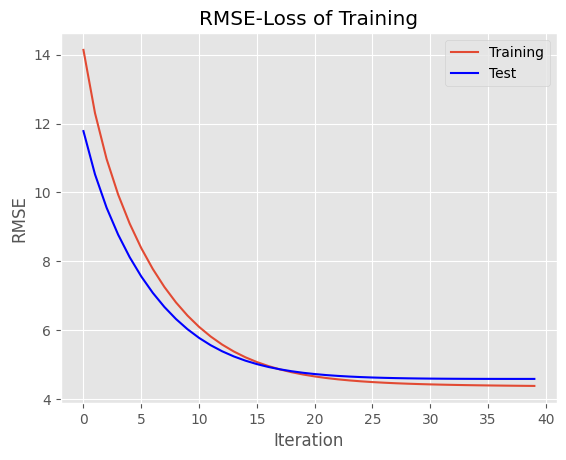

In [21]:
# Visualize Training process
plt.plot(train_losses, label="Training")
plt.plot(test_losses, c='blue', label="Test")
plt.title("RMSE-Loss of Training")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.show()

## Aufgabe 3.2 (Zusatzaufgabe) (Logistische Regression in PyTorch) [4 Punkte*]
**Diese Punkte sind nicht relevant für die Bestimmung der Bestehensgrenze, können aber von Ihnen als Zusatzpunkte gesammelt werden.**

Der _Wisconsin Breast Cancer_ Datensatz enthält Messwerte von Gewebeproben der Brust, sowie eine Variable `diagnosis`, welche angibt, ob die Gewebeprobe tumorös (1) oder gesund ist (0). Weitere Informationen finden Sie hier: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Schreiben Sie den obigen Code um, so dass Sie eine logistische Regression trainieren, welche basierend auf den Messwerten erkennt, ob eine vorliegnde Gewebeprobe tumorös oder nicht-tumorös ist. Benutzen Sie als Verlustfunktion die Cross-Entropy. Was ist die Accuracy auf den Trainingsdaten? 

### Lösung Aufgabe 3.2

In [22]:
## Load Data
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
cancer = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)
cancer["diagnosis"] = cancer_dataset.target
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset.data, cancer_dataset.target, test_size = 0.2, random_state=12)

In [24]:
# Scale Variables (StandardScaler)
sc = StandardScaler()

# fit & transform scaler
X_train = sc.fit_transform(X_train)

# apply scaler to test set
X_test = sc.transform(X_test)

In [25]:
## To Tensor
x_train_ts = torch.tensor(X_train, dtype=torch.float)
x_test_ts = torch.tensor(X_test, dtype=torch.float)

y_train_ts = torch.tensor(y_train, dtype=torch.long).view(-1,1)
y_test_ts = torch.tensor(y_test, dtype=torch.long).view(-1,1)

In [26]:
x_train_ts.shape, y_train_ts.shape

(torch.Size([455, 30]), torch.Size([455, 1]))

**Ihr Code ab hier**